In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LassoCV, Lasso

In [11]:
parent_dir = os.path.dirname(os.getcwd())

### 1- Read clean LIS sample data

In [12]:
file = pd.read_csv(f"{parent_dir}/clean_data/it14i.csv")

### 2- Apply Lasso with Cross Validation

#### 2.1- Subset columns

In [13]:
file = file[["pilabour", "sex", "marital"]]

#### 2.2- Split into input and output elements

In [14]:
X = pd.get_dummies(file[['sex', 'marital']], drop_first=True)
y = file.values[:, 0]

#### # 2.3- Define model

In [15]:
lambda_try = [30**(x / 100.0) for x in range(1, 200, 10)]

In [16]:
# Initialize Lasso model
model = LassoCV(alphas=lambda_try, cv=5, verbose=True)

# Fit the model
model.fit(X, y)

# Perform cross-validation and calculate RMSE for each lambda
mse_means = []
for alpha in lambda_try:
    model.alpha = alpha
    scores = cross_val_score(
        model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_means.append(-scores.mean())

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

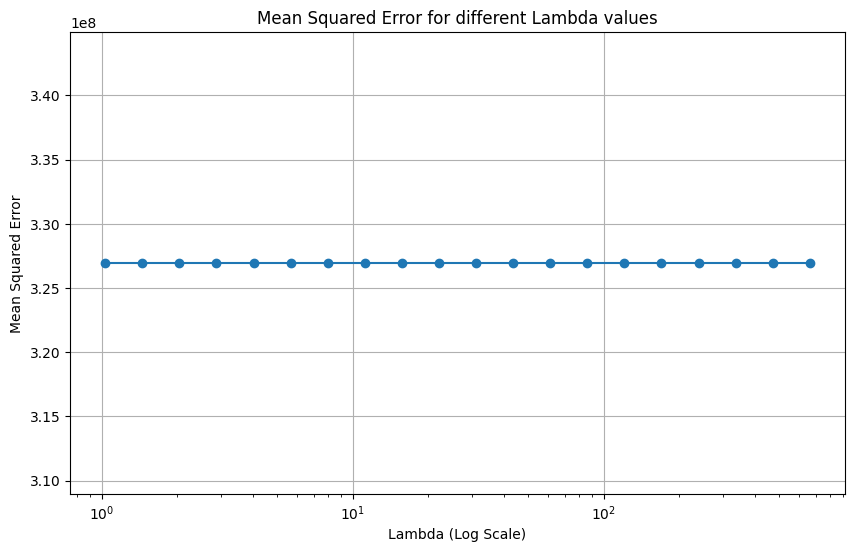

In [17]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lambda_try, mse_means, marker='o')
plt.xscale('log')
plt.xlabel('Lambda (Log Scale)')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for different Lambda values')
plt.grid(True)
plt.show()

In [18]:
# Display a model with a given lambda
# Calculate RMSE for the optimal lambda
optimal_lambda = model.alpha_
rmse = np.sqrt(min(mse_means))
print(
    f"The RMSE of this model, with an optimal lambda of {optimal_lambda}, is: {round(rmse, 2)}")

The RMSE of this model, with an optimal lambda of 1.034596994728644, is: 18081.45


In [19]:
# Display a model with a given lambda

model_with_desired_lambda = Lasso(alpha=optimal_lambda)

# Fit the model with the desired lambda
model_with_desired_lambda.fit(X, y)

# Get the coefficients
coefficients = model_with_desired_lambda.coef_

# Display the coefficients
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")


sex_[2]female: -7253.77843460362
marital_[210]never married/not in union: -5641.302823174856
marital_[220]formerly married/in union: -3086.356063221587
marital_[223]widowed: -13629.687423909616
